<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Балансировка-классов" data-toc-modified-id="Балансировка-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Балансировка классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [16]:
# импортируем бибилиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# импорт моделей
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# импорт утилит 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle

# импорт метрик
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

In [17]:
# считываем файл и выведем информацию о датасете
data = pd.read_csv('/datasets/Churn.csv')
display(data.head(3))
data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Признаки:

* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

Целевой признак:
* `Exited` — факт ухода клиента

Столбец `Tenure` имеет пустые значения, выведем уникальные значения.

In [18]:
# посмотрим строки с пустыми значениями
# выведем уникальные

display(data[data['Tenure'].isna()].head(3))
print(data['Tenure'].value_counts())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0


1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64


Изначально предполагалось, что пустые значения - это клиент банка, который только начал пользоваться услугами, но у таких клиентах в столбце стоит значение 0, тогда заполним пустые строки медианными значениями.

In [19]:
# Сгруппируем данные по стране, полу и возврасту
# найдем медианну по стобцу `Tenure`
# Напишем функцию перебора и заполнения пустых ячеек медианным значениями исходя из фильтра
# Оставщиеся значения заполним медианой

data_fill = data.groupby(['Geography', 'Gender', 'Age']).agg({'Tenure':'median'}).reset_index()

def fill_empty_tenure(row):
      
    row_filter =(
        (data_fill['Geography'] == row['Geography']) & 
        (data_fill['Gender'] == row['Gender']) &
        (data_fill['Age'] == row['Age'])
   )
    
    tenure_value = data_fill[row_filter]['Tenure'].iloc[0]
    
    if tenure_value:
        row['Tenure'] = tenure_value

    return row

#data[data['Tenure'].isna()] = data[data['Tenure'].isna()].apply(fill_empty_tenure, axis=1)  
#data.loc[data['Tenure'].isna(), ('Tenure')] = data['Tenure'].median()
#print('Пустых строк:', len(data[data['Tenure'].isna()]))

In [20]:
data.loc[data['Tenure'].isna(), ('Tenure')] = np.random.randint(0, 11)

Для перевода категориальных переменных воспользуемся прямым кодированием.

In [21]:
# Используем прямое кодирование, удалим столбцем 'Surname', 'CustomerId', 'RowNumber'
# что бы не попасть в дамми-ловушку метод get_dummies вызываем с парамером drop_first=True

data_ohe = pd.get_dummies(data.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1), drop_first=True)
display(data_ohe.info())
data_ohe.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


Разобьем данные на обучающую, вадидационную и тестовую выборку.

In [22]:
# Разбиваем данные на
# Признаки и целевые признаки на тестовые и валидационные выборки
# Удалим из признаков целевой признак

features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']

data_train, data_test = train_test_split(data_ohe, test_size=0.4, random_state=12345, stratify=data_ohe['Exited'])
data_test, data_valid = train_test_split(data_test, test_size=0.5, random_state=12345)

features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']

features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']

features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

Все признаки важны, по этому стандартизируем данные что бы минимизировать разброс, т.к алгоритм может посчитать какой-то из признаков более важным.

In [23]:
# Отключим вывод предупржедений
# Пречислим столбцы для стандартизации признаков
# Воспользуемся классом StandardScaler
# Выведем на акран

pd.options.mode.chained_assignment = None
columns = ['Age', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[columns])

features_train[columns] = scaler.transform(features_train[columns])
features_valid[columns] = scaler.transform(features_valid[columns])
features_test[columns] = scaler.transform(features_test[columns])

display(features_train[columns].head(3))
display(features_valid[columns].head(3))
display(features_test[columns].head(3))

,Age,Tenure,CreditScore,Balance,EstimatedSalary
2837,0.953312,0.287258,-1.040434,0.774657,-0.119110
9925,-0.095244,0.642922,0.454006,1.910540,-0.258658
8746,-0.476537,0.998585,0.103585,0.481608,1.422836


,Age,Tenure,CreditScore,Balance,EstimatedSalary
8035,-0.857830,0.998585,-0.751852,0.257705,0.452454
369,-0.953153,-1.135397,-0.586949,1.212991,-1.154131
3812,0.095403,0.642922,-0.257141,1.037286,1.338271


,Age,Tenure,CreditScore,Balance,EstimatedSalary
6113,-0.285890,-1.135397,-0.556029,-1.219673,0.437216
760,0.381372,-0.068406,-0.514803,0.921527,1.640143
1419,0.476696,-1.135397,-1.184724,0.608480,0.624456


### Вывод

В датасете присутствовал столбец `Tenure` с пустыми значениям, что бы его заполнить получили медианное значение из группировки по трем столбцам. Категориальные признаки были подготовлены методом прямого кодирования, а данные были стандартизированы.

Стандартизация данных необходима для уравновешивания признаков, т.к алгоритм из-за большого разброса может посчитать какой-то из признаков важнее.

## Исследование задачи

Посмотрим на баланс классов, в большинстве задач всегда встречается дисбаланс.

<AxesSubplot:>

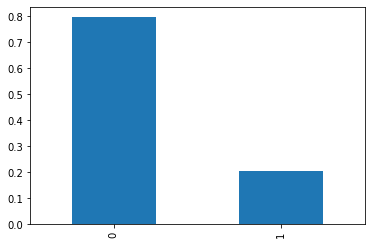

In [24]:
# Используем метод value_counts, с параметром normalize
# построим диаграмму

class_frequency = data['Exited'].value_counts(normalize=True)
class_frequency.plot(kind='bar')

 Порядка 80% клиентов остаются в банке. Отток клиентов составляет 20%.<br>

В первую очередь проверим на дубликаты - это тоже может влиять на баланс классов

In [25]:
print('Количество дубликатов:', len(data[data.duplicated()]))

Количество дубликатов: 0


Проверим модель на адекватность. Для этого построим решающее дерево без учета дисбаланса классов.

F1: 0.5406643757159222
Accuracy: 0.7995


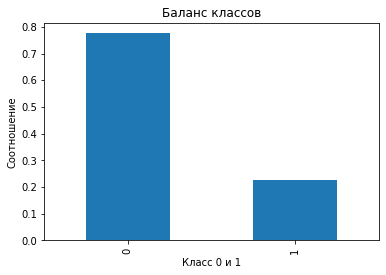

In [26]:
# используем решающее дерево
# Посмотрим на f-меру и accuracy
# выведем график

model = DecisionTreeClassifier()
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

print("F1:", f1_score(target_valid, predicted_valid))
print('Accuracy:', accuracy_valid)

predicted_valid = pd.Series(predicted_valid).value_counts(normalize=True)
predicted_valid.plot(kind='bar')

plt.title('Баланс классов')
plt.ylabel('Соотношение')
plt.xlabel('Класс 0 и 1')
plt.show()

Наблюдается дисбаланс, а F - мера 53.3%.  Создадим константную модель для проверки на адекватность.

In [27]:
# создадим константную модель
# при помощи библиотеки np и метода randint
# размер должен быть такой же как у датасета

target_pred_constant = pd.Series(np.random.randint(0, 1, size=(10000)))
print('Accuracy:', accuracy_score(target, target_pred_constant))

Accuracy: 0.7963


Проверку на адекватность модель не прошла, со всеми нулями в целевом признаке модель может поставить единицу.

Построим модель «Случайного леса» без учета дисбаланса классов.

In [28]:
# Подберем лучшие гиперпараметры для Случайного леса
# n_estimators и max_depth
# сохраним результаты лучших моделей

best_model_random_tree = None
best_result = 0
best_est = 0
best_depth_tree = 0
for est in range(120, 210, 10): #range(165, 335, 45):
    
    for depth in range(1, 16):#range(165, 335, 45):
        
        model = RandomForestClassifier(random_state=12345, 
                                        n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
    
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid) 
    
        if result > best_result:
            best_depth_tree = depth
            best_est = est
            best_result = result
            best_model_random_tree = model
            
        
print("F1:", result)

probabilities_valid = best_model_random_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ROC:', auc_roc)

F1: 0.5915080527086384
ROC: 0.8674613602624269


### Вывод

При построении модели Случайного леса без борьбы с дисбалансом была достигнута f-мерв в **59.1%**, а ROC-AUC **86.7%**, остальные модели показали себя хуже.

## Борьба с дисбалансом

In [29]:
# Функция для построение Roc-кривой

def func_roc_curve(target, probabilities_one):
    
    fpr, tpr, thresholds = roc_curve(target, probabilities_one)

    plt.figure()

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')

    auc_roc = roc_auc_score(target, probabilities_one)
    print('ROC:', auc_roc)

### Балансировка классов

Обучим разные модели и найдем лучшую. Обучим модель «Решающее дерево» с учетом дисбаланса.

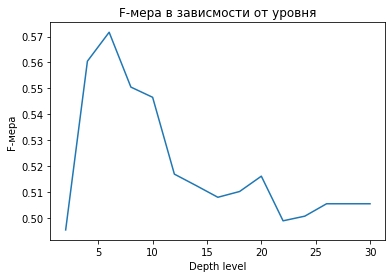

F1: 0.5716911764705882


In [30]:
# Напишем цикл в котором найдем лучшую модель решащего дерева
# запомним лучшую модель
# построим график зависимости f-меры от максимальной глубины 

best_depth = 0
f1 = 0
best_model = None

depth_levels = []
f1_levels = []
for depth in range (2, 32, 2):
    for
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    
    predicted_valid = model.predict(features_valid)
    
    f1_current = f1_score(target_valid, predicted_valid)
  
    depth_levels.append(depth)
    f1_levels.append(f1_current)
    
    if f1_current > f1:
        f1 = f1_current
        best_dept = depth
        best_model = model

plt.plot(depth_levels, f1_levels, label='Accuracy об. выборки')

plt.title('F-мера в зависмости от уровня')
plt.ylabel('F-мера')
plt.xlabel('Depth level')
plt.show()

print('F1:', f1)

При взвешивании классов f-мера повысилась до **57.1%**.

ROC: 0.8284534826644958


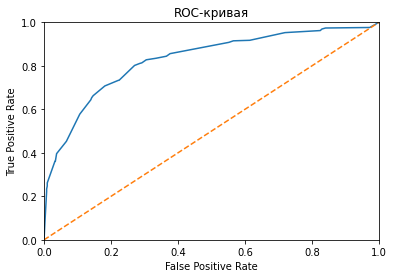

In [31]:
# выведем Roc-кривую для решающего дерева

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
func_roc_curve(target_valid, probabilities_one_valid)

Обучим модель «Случайный лес» с учетом дисбаланса.

In [32]:
%%time

# Обьявим модель и найдем параметры 
# переададим их в GridSearchCV 
#установим параметр cv 8 (на сколько частей разбивать данные)

model = RandomForestClassifier()

params = {
    'class_weight': ['balanced'],
    'random_state': [12345],
    'n_estimators': range(40, 180, 20),
    'max_depth': [8]
}

gs = GridSearchCV(model, params, cv=8, scoring='f1')

gs.fit(features_train, target_train)
predicted_valid = gs.best_estimator_.predict(features_valid)
gs_random_tree = gs
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.645021645021645
CPU times: user 24.9 s, sys: 115 ms, total: 25 s
Wall time: 25.2 s


При взвешивании классов и использовании кросс валидации f-мера повысилась до **64.5%**.

Построим Roc-кривую. Для лучшей модели Случайного леса.

ROC: 0.871947131500814


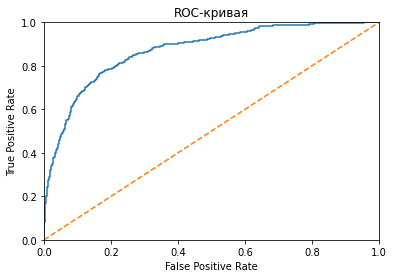

In [33]:
# выведем Roc-кривую для случайного леса

probabilities_valid = gs.best_estimator_.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

func_roc_curve(target_valid, probabilities_one_valid)

Обучим модель «Логистическая регрессия» с учетом дисбаланса.

In [34]:
# вызовем класс с гиперпараметрами
# обучим модель методом fit

model = LogisticRegression(class_weight='balanced', random_state=12345, solver='liblinear')

model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5068493150684931


При взвешивании классов и использовании кросс валидации f-мера повысилась до **50.6%**.

ROC: 0.7731105138396706


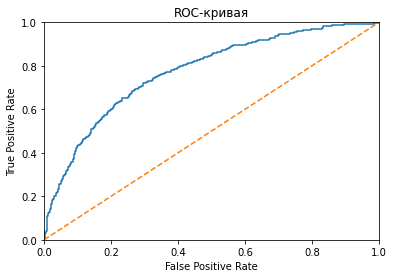

In [35]:
# выведем Roc-кривую для Логистической регрессии

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

func_roc_curve(target_valid, probabilities_one_valid)

### Увеличение выборки

In [36]:
# Функция для Решающего дерева
def func_decision_tree (stop, start, iteration, features, target, features_valid, target_valid):
    f1 = 0
    model = None
    best_model = None
    for depth in range(stop, start, iteration):

        model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)

        predicted_valid = model.predict(features_valid)

        f1_current = f1_score(target_valid, predicted_valid)

        if f1_current > f1:
            f1 = f1_current
            best_model = model 
            
    probabilities_valid = best_model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    func_roc_curve(target_valid, probabilities_one_valid)    
    print('F1:', f1)  
    
# Функция для Случайного леса 
def func_random_tree (stop, start, iteration, depth, features, target, features_valid, target_valid):    

    model = RandomForestClassifier()

    params = {
    #   'class_weight': ['balanced'],
        'random_state': [12345],
        'n_estimators': range(stop, start, iteration),
        'max_depth': [depth]
    }

    gs = GridSearchCV(model, params, cv=8)

    gs.fit(features, target)
    predicted_valid = gs.best_estimator_.predict(features_valid)
    print("F1:", f1_score(target_valid, predicted_valid))
    
    probabilities_valid = gs.best_estimator_.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    func_roc_curve(target_valid, probabilities_one_valid)

# Функция для Логистической регрессии 
def func_logic_regression(features, target, features_valid, target_valid):
    
    model = LogisticRegression(random_state=12345, solver='liblinear')

    model.fit(features, target)
    predicted_valid = model.predict(features_valid)
    print("F1:", f1_score(target_valid, predicted_valid))
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    func_roc_curve(target_valid, probabilities_one_valid)


Для борьбы с дисбалансом используем технику увеличения выборки «upsampling».

In [37]:
# Разделим тестовую выборку на отрицательные и положительные объекты
# скопируем repeat раз полозительную выборку
# перемешаем функцией shuffle
# выведем размер выборок

features_positive = features_train[target_train == 1]
features_negative = features_train[target_train == 0]

target_positive = target_train[target_train == 1]
target_negative = target_train[target_train == 0]

repeat = 4
features_upsampled = shuffle(
    pd.concat([features_negative] + [features_positive] * repeat), random_state=12345)
target_upsampled = shuffle(
    pd.concat([target_negative] + [target_positive] * repeat), random_state=12345)

print('Размер features_upsampled:', features_upsampled.shape)
print('Размер target_upsampled:',  target_upsampled.shape)

Размер features_upsampled: (9666, 11)
Размер target_upsampled: (9666,)


<AxesSubplot:>

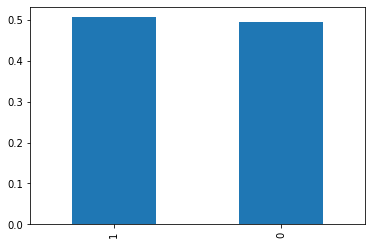

In [38]:
# Посмотрим на дисбаланс после замножения
class_frequency = target_upsampled.value_counts(normalize=True)
class_frequency.plot(kind='bar')

ROC: 0.815352336940906
F1: 0.5757847533632287


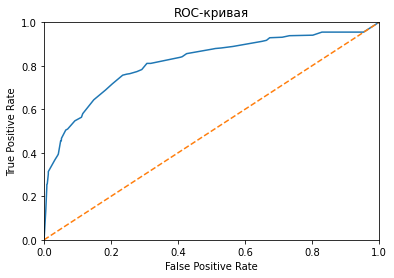

In [39]:
# Вызовем функцию дря решающего дерева
func_decision_tree (1, 16, 1, features_upsampled, target_upsampled, features_valid, target_valid)    

F1: 0.6402439024390244
ROC: 0.8706182358011684
CPU times: user 17.1 s, sys: 43.2 ms, total: 17.1 s
Wall time: 17.2 s


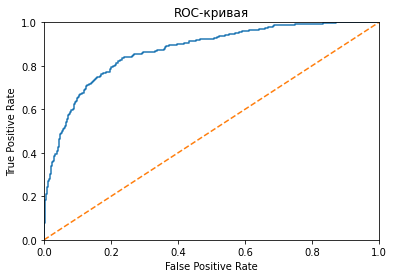

In [40]:
%%time
# Вызовем функцию для Случайного леса
# замерим время выполнения
func_random_tree (90, 180, 30, 8, features_upsampled, target_upsampled, features_valid, target_valid)

F1: 0.5050505050505051
ROC: 0.7731224858730006


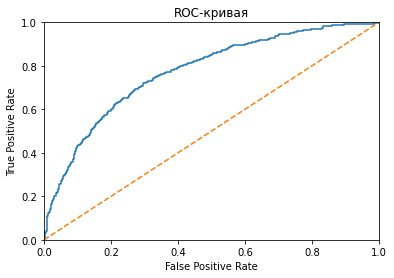

In [41]:
# Вызовем функцию для Логист. регрессии
func_logic_regression(features_upsampled, target_upsampled, features_valid, target_valid) 

### Уменьшение выборки

Для борьбы с дисбалансом используем технику увеличения выборки «downsampling».

In [42]:
# Выборка берется из пункта 3.2
# уменьшим негативный класс
# укажем долю для метода sample 

fraction = 0.26

features_downsampling = shuffle(
    pd.concat([features_negative.sample(frac=fraction, random_state=12345)] + [features_positive]), 
    random_state=12345)

target_downsampling = shuffle(
    pd.concat([target_negative.sample(frac=fraction, random_state=12345)] + [target_positive]), 
    random_state=12345)

print('Размер features_upsampled:', features_downsampling.shape)
print('Размер target_upsampled:',  target_downsampling.shape)

Размер features_upsampled: (2464, 11)
Размер target_upsampled: (2464,)


<AxesSubplot:>

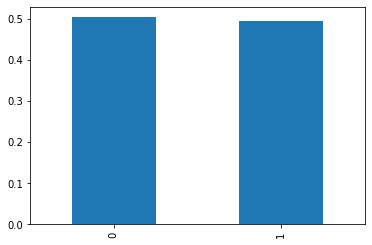

In [43]:
# Посмотрим на дисбаланс после замножения
class_frequency = target_downsampling.value_counts(normalize=True)
class_frequency.plot(kind='bar')

ROC: 0.815352336940906
F1: 0.5757847533632287


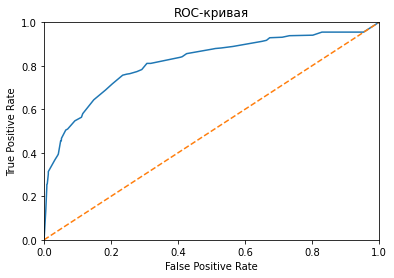

In [44]:
# Вызовем функцию дря решающего дерева
func_decision_tree(1, 16, 1, features_downsampling, target_downsampling, features_valid, target_valid)

F1: 0.6323809523809524
ROC: 0.8660254645148933


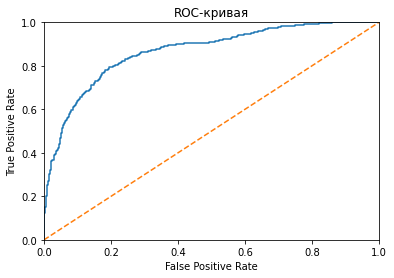

In [45]:
# Вызовем функцию дря случайного леса
func_random_tree (90, 180, 30, 8, features_downsampling, target_downsampling, features_valid, target_valid)

F1: 0.5146299483648881
ROC: 0.7725403457523226


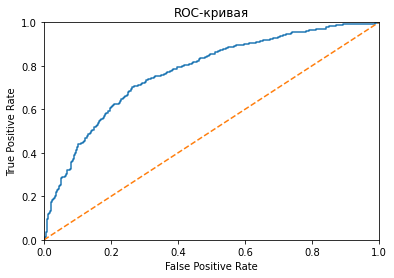

In [46]:
# Вызовем функцию для Логист. регрессии
func_logic_regression(features_downsampling, target_downsampling, features_valid, target_valid) 

### Вывод

Балансировка классов с кросс валидацией показывает лучшие результаты на модели «Случайного леса». Следом идет модель «Решающего дерева» и на последнем месте модель «Логистическая регрессия». Увеличение выборки и Уменьшение выборки показали результаты хуже.
В качестве примера возьмем лучшую модель:

* Балансировка классов, модель «Случайного леса» f-мера **64.5%**
* Увеличение выборки, модель «Случайного леса» f-мера **64.0%** 
* Уменьшение выборки, модель «Случайного леса» f-мера **63.2%**

## Тестирование модели

Протестируем лучшую модель «Случайный лес». Для этого обьеденим тестовые и валидационные данные.

F1: 0.6098964326812428
ROC: 0.8554422931114781


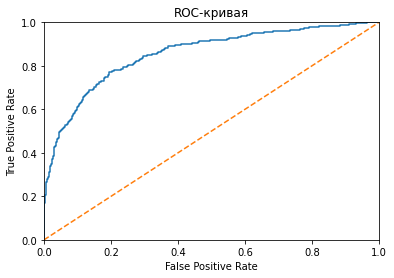

In [47]:
# обьеденим тестовую и валидационую выборку
# предскажем и выведем f-меру на экран

features_total = pd.concat([features_valid, features_test], ignore_index=True)
target_total = pd.concat([target_valid, target_test], ignore_index=True)

predicted_valid = gs_random_tree.best_estimator_.predict(features_test)
print("F1:", f1_score(target_test, predicted_valid))

probabilities_valid = gs_random_tree.best_estimator_.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
 
func_roc_curve(target_test, probabilities_one_valid)

## Вывод

При борьбе с дисбалансом были исследованы три метода «Балансировка классов», «Увеличение выборки», «Уменьшение выборки». Для каждого из метода найдена F-мера. Данные приведены в таблице:

| Модели                  | F-мера, Балансировка классов            | F-мера, Увеличение выборки | F-мера, Уменьшение выборки               |  
| :-------------------    | -------------------:| ---------------:|---------------:|   
| Решающее дерево         | 57.1%               | 57.5%         | 57.5%           | 
| Случайный лес           | 64.5%               | 64%           | 63.2%           |
| Логистическая регрессия | 59.1%               | 50.5%         | 51.4%           |


При «Балансировке классов» для всех трех моделей использовался гиперпараметр `class_weight='balanced'`, а для модели «Случайный лес» во всех методах использовалась кросс валидация.

Методы «Увеличение выборки», «Уменьшение выборки» замножали меньший класс или соответсвено отбрасывали больший. По сравнению с Балансировкой классов показали результаты немного хуже.

«Увеличение выборки» и «Уменьшение выборки» не рекомендуется использовать в качестве борьбы с дисбалансом. При «Увеличение выборки» создается много искусственных данных, а при уменьшении есть риски недообучения.

Была рассмотрена метрика ROC-AUC и построена ROC-кривая, чем значение метрики ближе к единице тем лучше. Данные в таблице ниже: 

| Модели                  | ROC-AUC, Балансировка классов            | ROC-AUC, Увеличение выборки | ROC-AUC, Уменьшение выборки               |  
| :-------------------    | -------------------:| ---------------:|---------------:|   
| Решающее дерево         | 82.8%               | 81.5%          | 86.6%           | 
| Случайный лес           | 87.1%               | 87%            | 77.2%          |
| Логистическая регрессия | 77.3%               | 77.3%          | 85.5%          |


На последнем этапе тестирования лучшей модели «Случайного леса» f-мера достигла показателей **61.4%**, а ROC-AUC **85.5%**.

ROC-AUC устойчива к дисбалансу, по этому лучше всего сначала смотреть на эту метрику, а потому на f-меру.

Построим график важности факторов лучшей модели.

<AxesSubplot:>

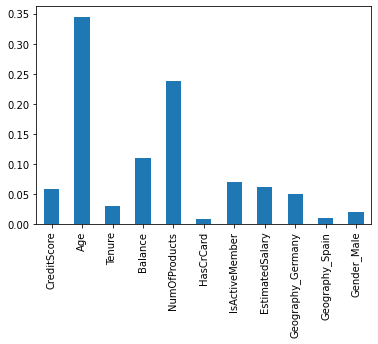

In [48]:
feature_names = [f"{i}" for i in features]

importances = gs_random_tree.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

forest_importances.plot(kind='bar')

Максимальное влияние на модель оказывает признак `Возвраст`, `Количество продуктов`, `Баланс`.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*